# Exercise 1: Linear Regression

In the first part of Exercise 1, we have been provided with a warmUpExercise in which we will be printing a 5*5 identity matrix and in the second part we have been provided with a dataset consisting of two columns. The first column is the population of a city and the second column is the profit of a food truck in that city. Remember, a negative value for profit indicates a loss.

we will solve the exercise step by step.  

before getting started, lets import all the important packages that we will need later on.  

In [157]:
# importing the important Libraries

# The OS module in Python provides functions for interacting with the operating system.
# Used for manipulating directory path.s
import os

# Used for computations of numerical data.
import numpy as np

# Used for reading data and data manipulation
import pandas as pd 

# Used for graphing data.
import matplotlib.pyplot as plt

# needed to plot 3-D surfaces
from mpl_toolkits.mplot3d import Axes3D  

# tells matplotlib to embed plots within the notebook
%matplotlib inline

# ==================== Part 1: Basic Function ====================
### warmUpExercise.m

In [158]:
def warmUpExercise():  
    A = np.eye(5)
    return A

In [159]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# ======================= Part 2: Plotting =======================

### ex1data1.txt

### * Linear regression with one variable

### Reading and Plotting the data

In [160]:
dataset = pd.read_csv(r'../DataSets/Exercise-1/ex1data1.txt', sep=",")
type(dataset)

pandas.core.frame.DataFrame

In [161]:
dataset.columns

Index(['6.1101', '17.592'], dtype='object')

In [162]:
# Renaming columns
dataset.rename(columns = {'6.1101':'Population(10k)', '17.592':'Profit($ 10k)'}, inplace = True)
df1=pd.DataFrame(np.array([[6.1101, 17.592]]), columns=['Population(10k)','Profit($ 10k)'])

dataset = pd.concat([df1, dataset], ignore_index=True)
# df.columns

In [163]:
dataset

,Population(10k),Profit($ 10k)
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [164]:
X = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values
print("X=", X.size)
print(X)
m = y.size # no. of training example (labels)
print("Y=", m)
print(y)

X= 97
[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
Y= 97
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263 

### Plotting the Data

Text(0.5, 0, 'Population of City in 10,000s')

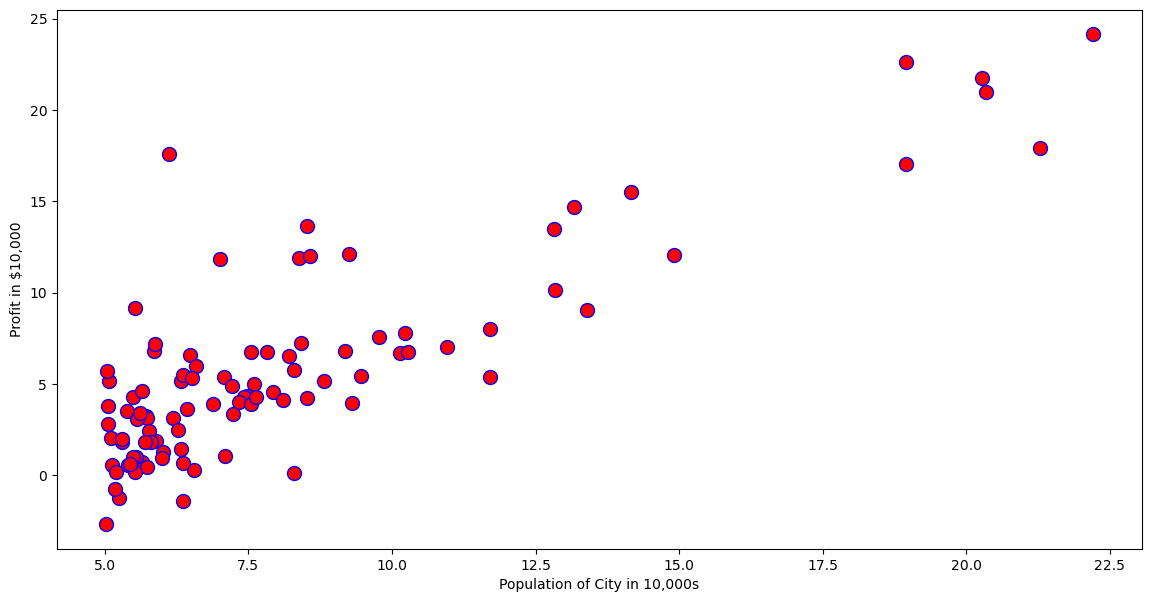

In [165]:
plt.figure(figsize=(14,7))

# 'ro' option refers to the markers(red circles), 'ms' refers to marker size while 'mec' property refers to the marker edge color.
plt.plot(X, y, 'ro', ms=10, mec='b')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

# =================== Part 3: Gradient descent ===================
### Gradient Descent
As we have learned from the course that Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost) and the cost function or Sum of Squeared Errors(SSE) is a measure of how far away our hypothesis is from the optimal hypothesis. 

In this part, we will fit the linear regression parameters $θ$ to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function  

$J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$  

where the hypothesis $h_\theta(x)$ is given by the linear model  
$h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$  

Recall that the parameters of our model are the $\theta_j$ values. These are the values we will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update  
$\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$

With each step of gradient descent, our parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).,

In [166]:
# adding the intercept
# X and Y are rank 1 arrays. rank 1 array's shape = (m, ) where as rank 2 array's shape = (m,1). 
# When operating on arrays its good to convert rank 1 arrays to rank 2 arrays because rank 1 arrays often give unexpected 
# results. To convert rank 1 to rank 2 array we use someArray[:,np.newaxis].
X = X[:, np.newaxis]
y = y[:, np.newaxis]

#initializing theta value into 0
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term

In [167]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

# Computing the cost $J(\theta)$

Now we will be computing the cost and the gradient descent. First we will compute the cost function and then find optimal parameters using gradient descent.

As we perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, we will implement a function to calculate $J(\theta)$ so we can check the convergence of our gradient descent implementation.

our next task is to complete the code for the function computeCost using gradient descent which computes $J(\theta)$. As we are doing this, remember that the variables  X and y  are not scalar values. X is a matrix whose rows represent the examples from the training set and y is a vector whose each elemennt represent the value at a given row of X.

In [168]:
# cost function
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCost(X, y, theta)
print(J)

32.072733877455676


# Finding the optimal parameters using Gradient Descent

In [169]:
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [170]:
# We now have the optimized value of theta, lets Use this value in the above cost function and compare both the values.
J = computeCost(X, y, theta)
print(J)

4.483388256587726


We got a value of 4.483 which is much better than 32.07

# Plot showing the best fit line

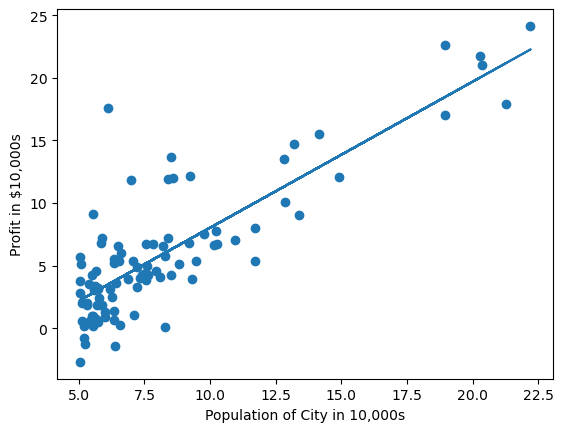

In [171]:
plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

In [172]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population size of 35,000 profit =', predict1*10000)

predict2 = np.dot([1, 7], theta)
print('For population size of 70,000 profit =', predict2*10000)

For population size of 35,000 profit = [4519.7678677]
For population size of 70,000 profit = [45342.45012945]


# ============= Part 4: Visualizing J(theta_0, theta_1) =============

###  Visualizing J(theta)

Text(0.5, 0.92, 'Surface')

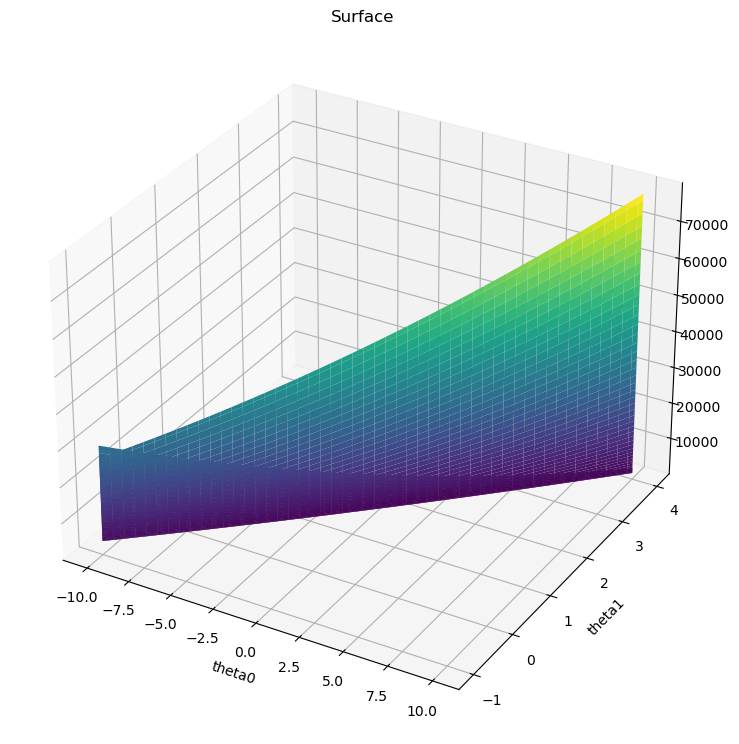

In [173]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

C:\Users\rama4\AppData\Local\Temp\ipykernel_7828\1752602300.py:5: UserWarning: No contour levels were found within the data range.
  plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))


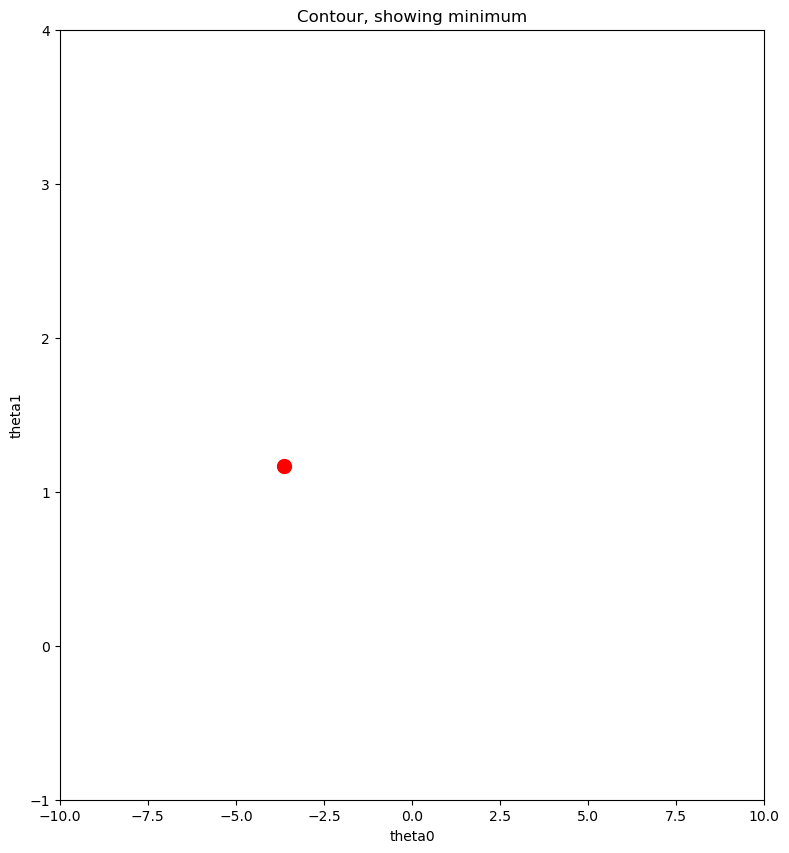

In [174]:
# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass

# * Linear regression with multiple variables

### ex1data2.txt

Now, we will implement linear regression with multiple variables (also called Multivariate Linear Regression).
The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [175]:
import numpy as np
import pandas as pd
data = pd.read_csv(r'../DataSets/Exercise-1/ex1data2.txt', sep = ',', header = None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [176]:
X = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples

# head(): returns the first k rows of the data set, useful for large datasets.
print(X.head(5))

      0  1
0  2104  3
1  1600  3
2  2400  3
3  1416  2
4  3000  4


In [177]:
# Renaming columns
data.rename(columns = {0:'size', 1:'bedrooms', 2:'price'}, inplace = True)
print(data.columns)
print(X.shape)

Index(['size', 'bedrooms', 'price'], dtype='object')
(47, 2)


In [178]:
len(data)

47

# ================ Part 1: Feature Normalization ================
### Feature Normalization

In [179]:
# Subtract the mean value of each feature from the dataset.
# After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”
X = (X - np.mean(X, axis=0))/np.std(X)
X.shape

(47, 2)

### Adding the intercept term and initializing parameters

In [180]:
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1))
y = np.array(y)[:,np.newaxis]
print(X.shape, y.shape)

(47, 3) (47, 1)


# ================ Part 2: Gradient Descent ================

### Computing the cost

In [181]:
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
print(X.shape)
print(theta.shape)
J = computeCostMulti(X, y, theta)
print(J)

(47, 3)
(3, 1)
65591548106.45744


### Finding the optimal parameters using Gradient Descent

In [182]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


since we got the optimized value of theta . we will use this value in the above cost function.

In [183]:
J = computeCostMulti(X, y, theta)
print(J)

2105448288.6292474


This this give us the value of 2105448288.6292474 which is much better than 65591548106.45744

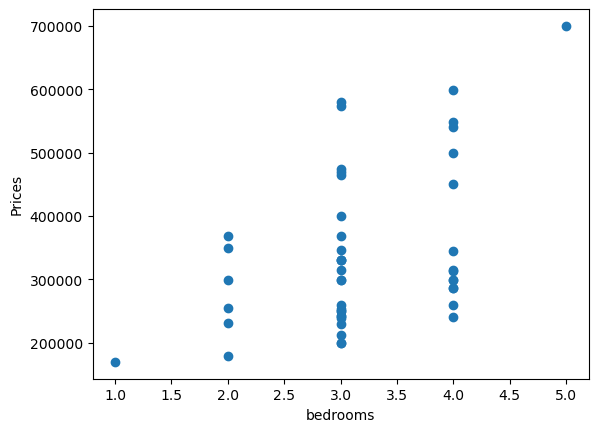

In [184]:
# Drawing and plotting model
plot = "bedrooms"
plt.scatter(data[plot], data["price"])
plt.xlabel(plot)
plt.ylabel("Prices")
plt.show()